# Fatals Police Shooting In The USA Analysis
### Sagi Polaczek
#### -14 September 2020- 


## Introduction
Police shooting is one of the most hot topics in the USA nowdays.  
.  
.  
.  


## Data Set
The dataset (fps_data.csv) was obtained from The Washington Post's repository.  
The Post's dataset contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.  
The dataset describes 15 details about each killing, and is documenting only those shootings in which a police officer, in the line of duty, shoots and kills a civilian.  
.  
.  
.  


# Preliminaries:  
In this project we'll use the following python packages:

In [2]:
# Importing libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing two useful functions 
from statistics import median, mean

Lets import the data as a Pandas's DataFrame and take a first look:

In [57]:
fps_data = pd.read_csv('fps_data.csv', index_col = 'id')
print("\nThis dataset contains %d rows." %fps_data.shape[0])
print("\nThe dataset's columns:", ', '.join(list(fps_data.columns)))
fps_data.head()


This dataset contains 5624 rows.

The dataset's columns: name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera, longitude, latitude, is_geocoding_exact


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
id,,,,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Exploring missing and unique values:

In [4]:
print(fps_data.isnull().sum())

name                       209
date                         0
manner_of_death              0
armed                      212
age                        252
gender                       1
race                       591
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       276
body_camera                  0
longitude                  272
latitude                   272
is_geocoding_exact           0
dtype: int64


Because the dataset has a total of 5624 rows, we are not concern by the missing values.   
Furthermore, in this project we focus on data exploration and visualization and not on building a prediction model, so we won't touch those missing values.

# Data Exploration
We'll start explored the data for each feature individually.   
Later on we'll procceed to multivariate visualization.

## Date
Is there an increase in the number of fatal police shooting? Maybe a decrease? Maybe the shooting distribute unequally through the months of the year?

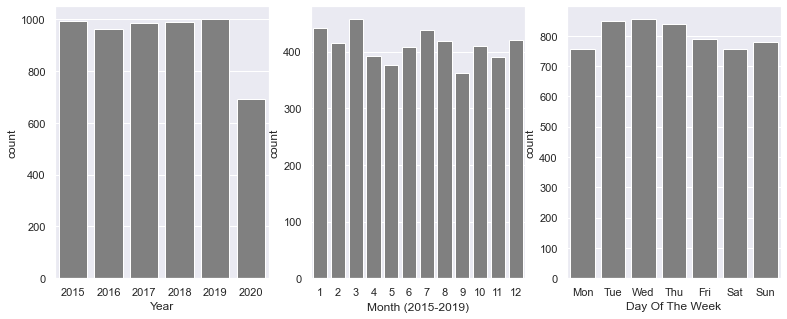

In [141]:
# Converting the date dtype from 'object' to 'datetime'
fps_data['date'] = pd.to_datetime(fps_data['date'], infer_datetime_format=True)


fps_years = fps_data['date'].dt.year
# Droped 2020 because the data is missing for September, October, November and December
fps_months = fps_data['date'].loc[fps_data['date'].dt.year != 2020].dt.month
fps_days = fps_data['date'].dt.dayofweek

# 
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plotting the graphs
fig, axs = plt.subplots(ncols=3, figsize=(13,5))
ax0 = sns.countplot(fps_years, ax=axs[0], color='grey').set_xlabel('Year')
ax1 = sns.countplot(fps_months, ax=axs[1], color='grey').set_xlabel('Month (2015-2019)')
ax2 = sns.countplot(fps_days, ax=axs[2], color='grey').set(xlabel='Day Of The Week', xticklabels=days_of_week)






* Years: 
    There is no such a difference between the years 2015-2019. However, according to the current date and the months distribution, we would expect 2020 to be with a higher number of fatal shooting. It can be associated to the public attention that the subject possess in the US nowdays.  
* Months:
    The months distribution varry a lot. Because we have only four years, we can't determine if there is any pattern. However, the gap between March and September is significant. It can be due weather or maybe national holidays.  
* Days of the week: There a more fatal encounters in the weekdays in comparison to weekends and mondays. I suggest it because there are less police forces in duty through the weekends and fewer people out of homes, and therfore less encounters in general, which causes less fatal encounters.
    


## Age
What is the victim's age distribution? What is the avrage victim's age?

The victim's age median is: 35.0
The victim's age mean is: 37.142405063291136


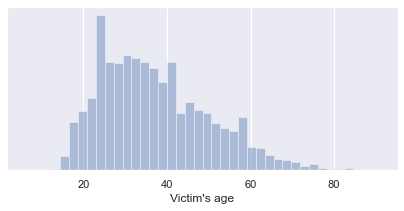

In [48]:
age_values = fps_data['age'].dropna().values
plt.figure(figsize=(7,3))
g = sns.distplot(age_values, axlabel="Victim's age", kde=False)
g.set(yticks=[])
sns.set(style="darkgrid", font_scale=1)

age_median = median(age_values)
age_mean = mean(age_values)

print("The victim's age median is:", age_median)
print("The victim's age mean is:", age_mean)



As we can see, the vast majority of the victims are young - in there 20's, 30's and early 40's.


## Manner Of Death

<AxesSubplot:ylabel='count'>

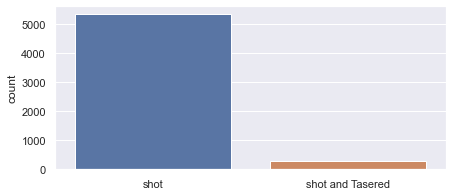

In [51]:
plt.figure(figsize=(7,3))
manner_values = fps_data['manner_of_death'].values
sns.countplot(manner_values)

As the graph suggests, the majority of the victims were only shoted.  
Clearly the police forces using the taser gun more a gunfire.  
So why this is happening?  

We can rase assumptions like:  
1. When a police officer uses the taser gun, the suspect should be paralyzed. So usually there is no need for a gunshot when taser is used.  
2. In some encounters, the suspects might be armed and dangerous, so taser gun is not an option for neutralize the threat.

Are we going to find a relation between the manner of death and any other feature?  
Maybe race? Age? Or even date? 

## Gender

<AxesSubplot:ylabel='count'>

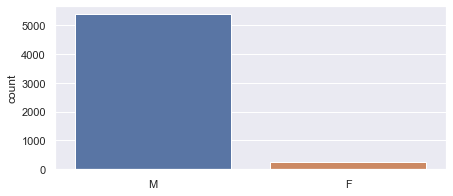

In [53]:
plt.figure(figsize=(7,3))
gender_values = fps_data['gender'].dropna().values
sns.countplot(gender_values)

This graph correlates with [the data](https://en.wikipedia.org/wiki/Sex_differences_in_crime#In_the_United_States) that the majority of crimes in the US are made by men, and correlates the common assumption that usually men are more threatening then women.

## Armed
Is the victim tend to be armed? Which weapons the victims had?

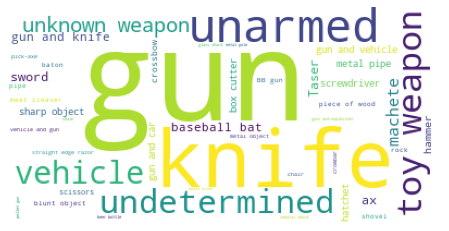


The are 95 unique armed values


In [54]:
# Importing a libary for the word cloud plot
from wordcloud import WordCloud

# Getting the frequencies for the armed values, and plotting
arms_freq = fps_data['armed'].dropna().value_counts().to_dict()
cloud = WordCloud(background_color='white').generate_from_frequencies(arms_freq)
plt.figure(figsize=(9,4))
plt.imshow(cloud)
plt.axis('off')
plt.show()


armed_unique = fps_data['armed'].dropna().unique()
print("\nThe are %d unique armed values" %len(armed_unique))


Thats quite a lot values for a graph.